In [8]:
#3.6.1
#%load_ext tensorboard
import tensorflow as tf
import datetime
from keras.datasets import boston_housing

# Clear any logs from previous runs
!rm -rf ./logs/ 

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

print(train_data.shape)
#print(test_data.shape)
#print(train_targets)

#normalize data
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
#print(train_data)

test_data -= mean
test_data /= mean

#network
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model
              
#Listing 3.2.7
#k-fold validation
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 200
all_mae_histories = []

for i in range(k):
    print("Processing fold #", i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
         axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
         axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0,
              callbacks=[tensorboard_callback])
    
    mae_history = history.history['mae']
    all_mae_histories.append(mae_history)

    average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

(404, 13)
Processing fold # 0
Epoch 1/500


2021-11-16 19:18:28.233186: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-11-16 19:18:28.233336: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-11-16 19:18:28.233655: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


204/303 [===================>..........] - ETA: 0s - loss: 313.6265 - mae: 14.4765

2021-11-16 19:18:28.705049: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-11-16 19:18:28.705068: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-11-16 19:18:28.729776: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-11-16 19:18:28.731126: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-11-16 19:18:28.732598: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/20211116-191828/train/plugins/profile/2021_11_16_19_18_28

2021-11-16 19:18:28.733405: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/fit/20211116-191828/train/plugins/profile/2021_11_16_19_18_28/Roys-MacBook-Pro.local.trace.json.gz
2021-11-16 19:18:28.735638: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/20211116-191828/tr

303/303 [==============================] - 1s 916us/step - loss: 225.5394 - mae: 11.3332
Epoch 2/500
303/303 [==============================] - 0s 722us/step - loss: 31.9726 - mae: 4.0348
Epoch 3/500
303/303 [==============================] - 0s 721us/step - loss: 22.7505 - mae: 3.3335
Epoch 4/500
303/303 [==============================] - 0s 749us/step - loss: 18.4677 - mae: 2.9556
Epoch 5/500
303/303 [==============================] - 0s 923us/step - loss: 17.4337 - mae: 2.7347
Epoch 6/500
303/303 [==============================] - 0s 732us/step - loss: 15.6856 - mae: 2.6777
Epoch 7/500
303/303 [==============================] - 0s 723us/step - loss: 14.3523 - mae: 2.5166
Epoch 8/500
303/303 [==============================] - 0s 726us/step - loss: 13.9436 - mae: 2.4668
Epoch 9/500
303/303 [==============================] - 0s 738us/step - loss: 12.8238 - mae: 2.4971
Epoch 10/500
303/303 [==============================] - 0s 719us/step - loss: 12.7843 - mae: 2.3352
Epoch 11/500
303/30

303/303 [==============================] - 0s 715us/step - loss: 2.4121 - mae: 1.1352
Epoch 166/500
303/303 [==============================] - 0s 725us/step - loss: 2.2642 - mae: 1.1197
Epoch 167/500
303/303 [==============================] - 0s 704us/step - loss: 2.3195 - mae: 1.1250
Epoch 168/500
303/303 [==============================] - 0s 733us/step - loss: 2.1237 - mae: 1.0857
Epoch 169/500
303/303 [==============================] - 0s 727us/step - loss: 2.4953 - mae: 1.1686
Epoch 170/500
303/303 [==============================] - 0s 730us/step - loss: 2.2963 - mae: 1.1279
Epoch 171/500
303/303 [==============================] - 0s 732us/step - loss: 2.2028 - mae: 1.0661
Epoch 172/500
303/303 [==============================] - 0s 721us/step - loss: 2.2371 - mae: 1.0868
Epoch 173/500
303/303 [==============================] - 0s 742us/step - loss: 2.1265 - mae: 1.0406
Epoch 174/500
303/303 [==============================] - 0s 757us/step - loss: 2.3594 - mae: 1.1172
Epoch 175/500


303/303 [==============================] - 0s 711us/step - loss: 1.4722 - mae: 0.8942
Epoch 248/500
303/303 [==============================] - 0s 725us/step - loss: 1.6491 - mae: 0.9105
Epoch 249/500
303/303 [==============================] - 0s 731us/step - loss: 1.6069 - mae: 0.8821
Epoch 250/500
303/303 [==============================] - 0s 711us/step - loss: 1.5013 - mae: 0.9015
Epoch 251/500
303/303 [==============================] - 0s 719us/step - loss: 1.5914 - mae: 0.9262
Epoch 252/500
303/303 [==============================] - 0s 707us/step - loss: 1.4947 - mae: 0.8896
Epoch 253/500
303/303 [==============================] - 0s 697us/step - loss: 1.4863 - mae: 0.8965
Epoch 254/500
303/303 [==============================] - 0s 716us/step - loss: 1.4882 - mae: 0.9327
Epoch 255/500
303/303 [==============================] - 0s 704us/step - loss: 1.3972 - mae: 0.8351
Epoch 256/500
303/303 [==============================] - 0s 696us/step - loss: 1.4063 - mae: 0.8943
Epoch 257/500


303/303 [==============================] - 0s 722us/step - loss: 1.1618 - mae: 0.7901
Epoch 330/500
303/303 [==============================] - 0s 702us/step - loss: 1.1330 - mae: 0.7741
Epoch 331/500
303/303 [==============================] - 0s 709us/step - loss: 1.2227 - mae: 0.8335
Epoch 332/500
303/303 [==============================] - 0s 701us/step - loss: 1.1379 - mae: 0.8185
Epoch 333/500
303/303 [==============================] - 0s 701us/step - loss: 1.2512 - mae: 0.8041
Epoch 334/500
303/303 [==============================] - 0s 706us/step - loss: 1.0804 - mae: 0.7767
Epoch 335/500
303/303 [==============================] - 0s 700us/step - loss: 1.3129 - mae: 0.8349
Epoch 336/500
303/303 [==============================] - 0s 702us/step - loss: 1.2563 - mae: 0.8019
Epoch 337/500
303/303 [==============================] - 0s 707us/step - loss: 1.2015 - mae: 0.8174
Epoch 338/500
303/303 [==============================] - 0s 701us/step - loss: 1.1253 - mae: 0.8060
Epoch 339/500


303/303 [==============================] - 0s 715us/step - loss: 0.9881 - mae: 0.6995
Epoch 412/500
303/303 [==============================] - 0s 714us/step - loss: 0.8904 - mae: 0.7234
Epoch 413/500
303/303 [==============================] - 0s 702us/step - loss: 0.9674 - mae: 0.7329
Epoch 414/500
303/303 [==============================] - 0s 746us/step - loss: 1.0164 - mae: 0.7219
Epoch 415/500
303/303 [==============================] - 0s 736us/step - loss: 0.9384 - mae: 0.7165
Epoch 416/500
303/303 [==============================] - 0s 730us/step - loss: 0.9258 - mae: 0.7236
Epoch 417/500
303/303 [==============================] - 0s 700us/step - loss: 1.0805 - mae: 0.7168
Epoch 418/500
303/303 [==============================] - 0s 729us/step - loss: 1.0766 - mae: 0.7595
Epoch 419/500
303/303 [==============================] - 0s 715us/step - loss: 0.8672 - mae: 0.6987
Epoch 420/500
303/303 [==============================] - 0s 725us/step - loss: 1.0024 - mae: 0.7383
Epoch 421/500


303/303 [==============================] - 0s 706us/step - loss: 0.8226 - mae: 0.6773
Epoch 494/500
303/303 [==============================] - 0s 702us/step - loss: 0.8794 - mae: 0.6506
Epoch 495/500
303/303 [==============================] - 0s 703us/step - loss: 0.7108 - mae: 0.6281
Epoch 496/500
303/303 [==============================] - 0s 696us/step - loss: 0.7795 - mae: 0.6543
Epoch 497/500
303/303 [==============================] - 0s 719us/step - loss: 0.8335 - mae: 0.6877
Epoch 498/500
303/303 [==============================] - 0s 700us/step - loss: 0.8763 - mae: 0.6606
Epoch 499/500
303/303 [==============================] - 0s 716us/step - loss: 0.7537 - mae: 0.6364
Epoch 500/500
303/303 [==============================] - 0s 704us/step - loss: 0.8550 - mae: 0.6793
Processing fold # 1
Epoch 1/500
210/303 [===================>..........] - ETA: 0s - loss: 265.4184 - mae: 12.7629

2021-11-16 19:20:29.766715: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-11-16 19:20:29.766736: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-11-16 19:20:29.789593: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-11-16 19:20:29.790907: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-11-16 19:20:29.791893: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/20211116-191828/train/plugins/profile/2021_11_16_19_20_29

2021-11-16 19:20:29.792713: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/fit/20211116-191828/train/plugins/profile/2021_11_16_19_20_29/Roys-MacBook-Pro.local.trace.json.gz
2021-11-16 19:20:29.794991: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/20211116-191828/tr

303/303 [==============================] - 1s 901us/step - loss: 194.1758 - mae: 10.1292
Epoch 2/500
303/303 [==============================] - 0s 713us/step - loss: 25.2756 - mae: 3.3221
Epoch 3/500
303/303 [==============================] - 0s 716us/step - loss: 20.0946 - mae: 2.8420
Epoch 4/500
303/303 [==============================] - 0s 716us/step - loss: 16.0888 - mae: 2.5387
Epoch 5/500
303/303 [==============================] - 0s 712us/step - loss: 14.3309 - mae: 2.4873
Epoch 6/500
303/303 [==============================] - 0s 943us/step - loss: 13.2499 - mae: 2.3525
Epoch 7/500
303/303 [==============================] - 0s 747us/step - loss: 12.6261 - mae: 2.3375
Epoch 8/500
303/303 [==============================] - 0s 736us/step - loss: 12.2007 - mae: 2.2045
Epoch 9/500
303/303 [==============================] - 0s 724us/step - loss: 11.2460 - mae: 2.2061
Epoch 10/500
303/303 [==============================] - 0s 717us/step - loss: 11.1221 - mae: 2.1451
Epoch 11/500
303/30

303/303 [==============================] - 0s 705us/step - loss: 2.1648 - mae: 1.0262
Epoch 166/500
303/303 [==============================] - 0s 705us/step - loss: 2.2222 - mae: 1.0347
Epoch 167/500
303/303 [==============================] - 0s 708us/step - loss: 1.8403 - mae: 0.9701
Epoch 168/500
303/303 [==============================] - 0s 709us/step - loss: 2.0610 - mae: 1.0262
Epoch 169/500
303/303 [==============================] - 0s 704us/step - loss: 2.2326 - mae: 1.0906
Epoch 170/500
303/303 [==============================] - 0s 706us/step - loss: 2.0479 - mae: 1.0119
Epoch 171/500
303/303 [==============================] - 0s 704us/step - loss: 2.1189 - mae: 1.0109
Epoch 172/500
303/303 [==============================] - 0s 711us/step - loss: 1.8205 - mae: 0.9879
Epoch 173/500
303/303 [==============================] - 0s 710us/step - loss: 1.9946 - mae: 1.0429
Epoch 174/500
303/303 [==============================] - 0s 707us/step - loss: 1.9715 - mae: 1.0337
Epoch 175/500


303/303 [==============================] - 0s 722us/step - loss: 1.6159 - mae: 0.8834
Epoch 248/500
303/303 [==============================] - 0s 708us/step - loss: 1.5390 - mae: 0.8941
Epoch 249/500
303/303 [==============================] - 0s 713us/step - loss: 1.3234 - mae: 0.8295
Epoch 250/500
303/303 [==============================] - 0s 712us/step - loss: 1.3815 - mae: 0.8663
Epoch 251/500
303/303 [==============================] - 0s 709us/step - loss: 1.5147 - mae: 0.8905
Epoch 252/500
303/303 [==============================] - 0s 712us/step - loss: 1.5350 - mae: 0.8625
Epoch 253/500
303/303 [==============================] - 0s 711us/step - loss: 1.2233 - mae: 0.8323
Epoch 254/500
303/303 [==============================] - 0s 710us/step - loss: 1.6148 - mae: 0.8999
Epoch 255/500
303/303 [==============================] - 0s 708us/step - loss: 1.3240 - mae: 0.8595
Epoch 256/500
303/303 [==============================] - 0s 708us/step - loss: 1.3730 - mae: 0.8525
Epoch 257/500


303/303 [==============================] - 0s 737us/step - loss: 1.0233 - mae: 0.7226
Epoch 330/500
303/303 [==============================] - 0s 735us/step - loss: 1.1409 - mae: 0.7626
Epoch 331/500
303/303 [==============================] - 0s 727us/step - loss: 1.1223 - mae: 0.7818
Epoch 332/500
303/303 [==============================] - 0s 725us/step - loss: 1.2027 - mae: 0.7428
Epoch 333/500
303/303 [==============================] - 0s 730us/step - loss: 1.2789 - mae: 0.7900
Epoch 334/500
303/303 [==============================] - 0s 707us/step - loss: 1.0550 - mae: 0.7779
Epoch 335/500
303/303 [==============================] - 0s 702us/step - loss: 1.2521 - mae: 0.8174
Epoch 336/500
303/303 [==============================] - 0s 712us/step - loss: 1.0192 - mae: 0.7547
Epoch 337/500
303/303 [==============================] - 0s 708us/step - loss: 1.1454 - mae: 0.7547
Epoch 338/500
303/303 [==============================] - 0s 707us/step - loss: 1.0711 - mae: 0.7349
Epoch 339/500


303/303 [==============================] - 0s 726us/step - loss: 0.8514 - mae: 0.6593
Epoch 412/500
303/303 [==============================] - 0s 719us/step - loss: 0.9538 - mae: 0.7241
Epoch 413/500
303/303 [==============================] - 0s 724us/step - loss: 0.9009 - mae: 0.6800
Epoch 414/500
303/303 [==============================] - 0s 706us/step - loss: 0.9590 - mae: 0.7178
Epoch 415/500
303/303 [==============================] - 0s 707us/step - loss: 0.9025 - mae: 0.6743
Epoch 416/500
303/303 [==============================] - 0s 706us/step - loss: 0.9394 - mae: 0.6860
Epoch 417/500
303/303 [==============================] - 0s 709us/step - loss: 0.8538 - mae: 0.6715
Epoch 418/500
303/303 [==============================] - 0s 710us/step - loss: 0.9433 - mae: 0.6824
Epoch 419/500
303/303 [==============================] - 0s 707us/step - loss: 0.9083 - mae: 0.6958
Epoch 420/500
303/303 [==============================] - 0s 709us/step - loss: 0.8589 - mae: 0.6845
Epoch 421/500


303/303 [==============================] - 0s 707us/step - loss: 0.7434 - mae: 0.6581
Epoch 494/500
303/303 [==============================] - 0s 707us/step - loss: 0.7208 - mae: 0.6349
Epoch 495/500
303/303 [==============================] - 0s 721us/step - loss: 0.7533 - mae: 0.6290
Epoch 496/500
303/303 [==============================] - 0s 717us/step - loss: 0.7603 - mae: 0.6397
Epoch 497/500
303/303 [==============================] - 0s 701us/step - loss: 0.7292 - mae: 0.6464
Epoch 498/500
303/303 [==============================] - 0s 704us/step - loss: 0.6708 - mae: 0.6139
Epoch 499/500
303/303 [==============================] - 0s 707us/step - loss: 0.9114 - mae: 0.6985
Epoch 500/500
303/303 [==============================] - 0s 705us/step - loss: 0.7808 - mae: 0.6174
Processing fold # 2
Epoch 1/500
214/303 [====================>.........] - ETA: 0s - loss: 274.2730 - mae: 13.4797

2021-11-16 19:22:30.175438: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-11-16 19:22:30.175456: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-11-16 19:22:30.197963: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-11-16 19:22:30.199146: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-11-16 19:22:30.200125: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/20211116-191828/train/plugins/profile/2021_11_16_19_22_30

2021-11-16 19:22:30.200937: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/fit/20211116-191828/train/plugins/profile/2021_11_16_19_22_30/Roys-MacBook-Pro.local.trace.json.gz
2021-11-16 19:22:30.203196: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/20211116-191828/tr

303/303 [==============================] - 1s 887us/step - loss: 211.9321 - mae: 11.1620
Epoch 2/500
303/303 [==============================] - 0s 707us/step - loss: 31.3526 - mae: 3.8976
Epoch 3/500
303/303 [==============================] - 0s 712us/step - loss: 20.7041 - mae: 3.1321
Epoch 4/500
303/303 [==============================] - 0s 710us/step - loss: 16.9771 - mae: 2.8900
Epoch 5/500
303/303 [==============================] - 0s 716us/step - loss: 14.5894 - mae: 2.7189
Epoch 6/500
303/303 [==============================] - 0s 763us/step - loss: 12.9052 - mae: 2.4813
Epoch 7/500
303/303 [==============================] - 0s 707us/step - loss: 11.5897 - mae: 2.3884
Epoch 8/500
303/303 [==============================] - 0s 711us/step - loss: 11.3056 - mae: 2.3836
Epoch 9/500
303/303 [==============================] - 0s 706us/step - loss: 9.9292 - mae: 2.2992
Epoch 10/500
303/303 [==============================] - 0s 704us/step - loss: 10.2685 - mae: 2.2431
Epoch 11/500
303/303

303/303 [==============================] - 0s 743us/step - loss: 1.9905 - mae: 1.0120
Epoch 166/500
303/303 [==============================] - 0s 719us/step - loss: 2.0637 - mae: 1.0789
Epoch 167/500
303/303 [==============================] - 0s 731us/step - loss: 1.8483 - mae: 1.0046
Epoch 168/500
303/303 [==============================] - 0s 708us/step - loss: 1.7405 - mae: 0.9745
Epoch 169/500
303/303 [==============================] - 0s 729us/step - loss: 2.1221 - mae: 1.0932
Epoch 170/500
303/303 [==============================] - 0s 735us/step - loss: 1.7101 - mae: 0.9923
Epoch 171/500
303/303 [==============================] - 0s 723us/step - loss: 1.6892 - mae: 0.9803
Epoch 172/500
303/303 [==============================] - 0s 734us/step - loss: 1.8501 - mae: 1.0084
Epoch 173/500
303/303 [==============================] - 0s 717us/step - loss: 1.9115 - mae: 1.0035
Epoch 174/500
303/303 [==============================] - 0s 734us/step - loss: 1.8516 - mae: 1.0228
Epoch 175/500


303/303 [==============================] - 0s 705us/step - loss: 1.3752 - mae: 0.9096
Epoch 248/500
303/303 [==============================] - 0s 702us/step - loss: 1.4412 - mae: 0.8857
Epoch 249/500
303/303 [==============================] - 0s 730us/step - loss: 1.1214 - mae: 0.8178
Epoch 250/500
303/303 [==============================] - 0s 721us/step - loss: 1.4000 - mae: 0.8594
Epoch 251/500
303/303 [==============================] - 0s 737us/step - loss: 1.2832 - mae: 0.8245
Epoch 252/500
303/303 [==============================] - 0s 733us/step - loss: 1.2091 - mae: 0.8380
Epoch 253/500
303/303 [==============================] - 0s 728us/step - loss: 1.3293 - mae: 0.8777
Epoch 254/500
303/303 [==============================] - 0s 716us/step - loss: 1.2381 - mae: 0.8295
Epoch 255/500
303/303 [==============================] - 0s 716us/step - loss: 1.2464 - mae: 0.8309
Epoch 256/500
303/303 [==============================] - 0s 725us/step - loss: 1.3045 - mae: 0.8613
Epoch 257/500


303/303 [==============================] - 0s 719us/step - loss: 1.0114 - mae: 0.7894
Epoch 330/500
303/303 [==============================] - 0s 734us/step - loss: 0.8981 - mae: 0.7314
Epoch 331/500
303/303 [==============================] - 0s 722us/step - loss: 0.9550 - mae: 0.7301
Epoch 332/500
303/303 [==============================] - 0s 716us/step - loss: 0.9759 - mae: 0.7391
Epoch 333/500
303/303 [==============================] - 0s 726us/step - loss: 0.9297 - mae: 0.7333
Epoch 334/500
303/303 [==============================] - 0s 742us/step - loss: 1.0823 - mae: 0.7722
Epoch 335/500
303/303 [==============================] - 0s 710us/step - loss: 1.1078 - mae: 0.7613
Epoch 336/500
303/303 [==============================] - 0s 706us/step - loss: 0.8829 - mae: 0.6798
Epoch 337/500
303/303 [==============================] - 0s 705us/step - loss: 1.0255 - mae: 0.7421
Epoch 338/500
303/303 [==============================] - 0s 703us/step - loss: 0.9559 - mae: 0.6990
Epoch 339/500


303/303 [==============================] - 0s 740us/step - loss: 0.8369 - mae: 0.6846
Epoch 412/500
303/303 [==============================] - 0s 723us/step - loss: 0.8817 - mae: 0.7098
Epoch 413/500
303/303 [==============================] - 0s 710us/step - loss: 0.8535 - mae: 0.6776
Epoch 414/500
303/303 [==============================] - 0s 733us/step - loss: 0.7890 - mae: 0.6457
Epoch 415/500
303/303 [==============================] - 0s 707us/step - loss: 0.8916 - mae: 0.6902
Epoch 416/500
303/303 [==============================] - 0s 723us/step - loss: 0.6858 - mae: 0.6262
Epoch 417/500
303/303 [==============================] - 0s 726us/step - loss: 0.8183 - mae: 0.7016
Epoch 418/500
303/303 [==============================] - 0s 704us/step - loss: 0.7841 - mae: 0.6396
Epoch 419/500
303/303 [==============================] - 0s 731us/step - loss: 0.8492 - mae: 0.6759
Epoch 420/500
303/303 [==============================] - 0s 713us/step - loss: 0.7740 - mae: 0.6516
Epoch 421/500


303/303 [==============================] - 0s 729us/step - loss: 0.7342 - mae: 0.6314
Epoch 494/500
303/303 [==============================] - 0s 725us/step - loss: 0.6642 - mae: 0.6238
Epoch 495/500
303/303 [==============================] - 0s 721us/step - loss: 0.7298 - mae: 0.6464
Epoch 496/500
303/303 [==============================] - 0s 730us/step - loss: 0.6712 - mae: 0.6106
Epoch 497/500
303/303 [==============================] - 0s 730us/step - loss: 0.7141 - mae: 0.6291
Epoch 498/500
303/303 [==============================] - 0s 734us/step - loss: 0.6587 - mae: 0.6040
Epoch 499/500
303/303 [==============================] - 0s 733us/step - loss: 0.7133 - mae: 0.6298
Epoch 500/500
303/303 [==============================] - 0s 728us/step - loss: 0.6834 - mae: 0.6326
Processing fold # 3
Epoch 1/500
204/303 [===================>..........] - ETA: 0s - loss: 293.5896 - mae: 14.2717

2021-11-16 19:24:31.006626: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-11-16 19:24:31.006644: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-11-16 19:24:31.031720: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-11-16 19:24:31.032917: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-11-16 19:24:31.033884: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/20211116-191828/train/plugins/profile/2021_11_16_19_24_31

2021-11-16 19:24:31.034694: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/fit/20211116-191828/train/plugins/profile/2021_11_16_19_24_31/Roys-MacBook-Pro.local.trace.json.gz
2021-11-16 19:24:31.037006: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/20211116-191828/tr

303/303 [==============================] - 1s 919us/step - loss: 214.8681 - mae: 11.1699
Epoch 2/500
303/303 [==============================] - 0s 737us/step - loss: 26.6924 - mae: 3.4425
Epoch 3/500
303/303 [==============================] - 0s 741us/step - loss: 19.0939 - mae: 2.8339
Epoch 4/500
303/303 [==============================] - 0s 728us/step - loss: 15.5752 - mae: 2.6464
Epoch 5/500
303/303 [==============================] - 0s 730us/step - loss: 14.5387 - mae: 2.4713
Epoch 6/500
303/303 [==============================] - 0s 783us/step - loss: 13.1629 - mae: 2.3544
Epoch 7/500
303/303 [==============================] - 0s 710us/step - loss: 13.2329 - mae: 2.3181
Epoch 8/500
303/303 [==============================] - 0s 708us/step - loss: 11.9302 - mae: 2.2093
Epoch 9/500
303/303 [==============================] - 0s 731us/step - loss: 11.1100 - mae: 2.2086
Epoch 10/500
303/303 [==============================] - 0s 745us/step - loss: 11.1974 - mae: 2.1895
Epoch 11/500
303/30

303/303 [==============================] - 0s 733us/step - loss: 2.7098 - mae: 1.1073
Epoch 166/500
303/303 [==============================] - 0s 719us/step - loss: 2.7156 - mae: 1.1144
Epoch 167/500
303/303 [==============================] - 0s 783us/step - loss: 2.7712 - mae: 1.1107
Epoch 168/500
303/303 [==============================] - 0s 713us/step - loss: 2.8145 - mae: 1.1275
Epoch 169/500
303/303 [==============================] - 0s 719us/step - loss: 2.6964 - mae: 1.1368
Epoch 170/500
303/303 [==============================] - 0s 716us/step - loss: 2.6513 - mae: 1.0728
Epoch 171/500
303/303 [==============================] - 0s 712us/step - loss: 2.7513 - mae: 1.1331
Epoch 172/500
303/303 [==============================] - 0s 711us/step - loss: 2.6441 - mae: 1.0971
Epoch 173/500
303/303 [==============================] - 0s 715us/step - loss: 2.7800 - mae: 1.1180
Epoch 174/500
303/303 [==============================] - 0s 711us/step - loss: 2.6818 - mae: 1.0991
Epoch 175/500


303/303 [==============================] - 0s 724us/step - loss: 1.8919 - mae: 0.9348
Epoch 248/500
303/303 [==============================] - 0s 715us/step - loss: 1.9985 - mae: 0.9597
Epoch 249/500
303/303 [==============================] - 0s 726us/step - loss: 1.9650 - mae: 0.9563
Epoch 250/500
303/303 [==============================] - 0s 706us/step - loss: 1.6711 - mae: 0.9136
Epoch 251/500
303/303 [==============================] - 0s 704us/step - loss: 1.9879 - mae: 0.9674
Epoch 252/500
303/303 [==============================] - 0s 706us/step - loss: 2.0074 - mae: 0.9594
Epoch 253/500
303/303 [==============================] - 0s 711us/step - loss: 1.8158 - mae: 0.8985
Epoch 254/500
303/303 [==============================] - 0s 741us/step - loss: 1.9369 - mae: 0.9398
Epoch 255/500
303/303 [==============================] - 0s 702us/step - loss: 1.9593 - mae: 0.9473
Epoch 256/500
303/303 [==============================] - 0s 720us/step - loss: 1.8521 - mae: 0.9330
Epoch 257/500


303/303 [==============================] - 0s 708us/step - loss: 1.4736 - mae: 0.9016
Epoch 330/500
303/303 [==============================] - 0s 703us/step - loss: 1.4987 - mae: 0.8608
Epoch 331/500
303/303 [==============================] - 0s 697us/step - loss: 1.4875 - mae: 0.8567
Epoch 332/500
303/303 [==============================] - 0s 704us/step - loss: 1.4448 - mae: 0.8131
Epoch 333/500
303/303 [==============================] - 0s 706us/step - loss: 1.3274 - mae: 0.8134
Epoch 334/500
303/303 [==============================] - 0s 703us/step - loss: 1.4812 - mae: 0.8560
Epoch 335/500
303/303 [==============================] - 0s 704us/step - loss: 1.4205 - mae: 0.8518
Epoch 336/500
303/303 [==============================] - 0s 705us/step - loss: 1.4348 - mae: 0.8678
Epoch 337/500
303/303 [==============================] - 0s 702us/step - loss: 1.4583 - mae: 0.8777
Epoch 338/500
303/303 [==============================] - 0s 701us/step - loss: 1.4306 - mae: 0.8735
Epoch 339/500


303/303 [==============================] - 0s 720us/step - loss: 1.0105 - mae: 0.7358
Epoch 412/500
303/303 [==============================] - 0s 728us/step - loss: 1.1798 - mae: 0.7867
Epoch 413/500
303/303 [==============================] - 0s 731us/step - loss: 1.1060 - mae: 0.7781
Epoch 414/500
303/303 [==============================] - 0s 729us/step - loss: 1.0118 - mae: 0.7388
Epoch 415/500
303/303 [==============================] - 0s 713us/step - loss: 1.0613 - mae: 0.7365
Epoch 416/500
303/303 [==============================] - 0s 726us/step - loss: 1.2165 - mae: 0.8012
Epoch 417/500
303/303 [==============================] - 0s 715us/step - loss: 1.0557 - mae: 0.7531
Epoch 418/500
303/303 [==============================] - 0s 724us/step - loss: 1.0164 - mae: 0.7366
Epoch 419/500
303/303 [==============================] - 0s 744us/step - loss: 1.0633 - mae: 0.7711
Epoch 420/500
303/303 [==============================] - 0s 748us/step - loss: 1.0710 - mae: 0.7418
Epoch 421/500


303/303 [==============================] - 0s 716us/step - loss: 0.9259 - mae: 0.7016
Epoch 494/500
303/303 [==============================] - 0s 706us/step - loss: 0.8560 - mae: 0.6785
Epoch 495/500
303/303 [==============================] - 0s 702us/step - loss: 0.8849 - mae: 0.6983
Epoch 496/500
303/303 [==============================] - 0s 707us/step - loss: 1.0184 - mae: 0.7135
Epoch 497/500
303/303 [==============================] - 0s 704us/step - loss: 0.8196 - mae: 0.6936
Epoch 498/500
303/303 [==============================] - 0s 720us/step - loss: 0.8776 - mae: 0.7053
Epoch 499/500
303/303 [==============================] - 0s 711us/step - loss: 0.9651 - mae: 0.6907
Epoch 500/500
303/303 [==============================] - 0s 733us/step - loss: 0.9335 - mae: 0.6996


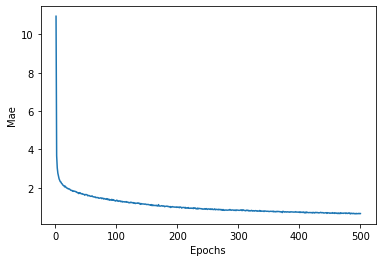

In [9]:
#Listing 3.30 Plotting validation scores
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Mae')
plt.show()

In [11]:
#Listing 3.3.1
model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
print(test_mae_score)

4/4 [==============================] - 0s 1ms/step - loss: 274.9218 - mae: 9.2647
9.26467514038086
